<a href="https://colab.research.google.com/github/schandra63/Supervised-Learning/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV,cross_val_predict, train_test_split,learning_curve,validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import time
import pandas as pd
import seaborn as sns

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
start = time.time()

In [ ]:
df_white = pd.read_csv('wineQualityWhites.csv')
df_red = pd.read_csv('wineQualityReds.csv')
df_wine = df_white.append(df_red)
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
Unnamed: 0              6497 non-null int64
fixed.acidity           6497 non-null float64
volatile.acidity        6497 non-null float64
citric.acid             6497 non-null float64
residual.sugar          6497 non-null float64
chlorides               6497 non-null float64
free.sulfur.dioxide     6497 non-null float64
total.sulfur.dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [ ]:
if df_wine.isnull().values.any():
    print("Warning: Missing Data")
df_wine.describe(include='all')

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2043.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,813.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1650.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,3274.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,4898.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


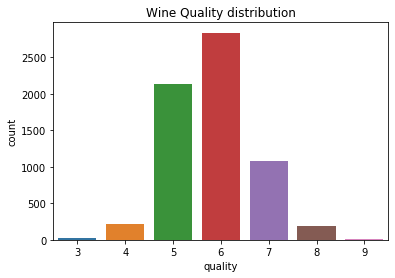

In [ ]:
sns.countplot(x='quality', data = df_wine);
plt.title('Wine Quality distribution')
plt.savefig('wine_dataset.png')

In [ ]:
df_phising = pd.read_csv('dataset.csv').astype('category')
df_phising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
index                          11055 non-null category
having_IPhaving_IP_Address     11055 non-null category
URLURL_Length                  11055 non-null category
Shortining_Service             11055 non-null category
having_At_Symbol               11055 non-null category
double_slash_redirecting       11055 non-null category
Prefix_Suffix                  11055 non-null category
having_Sub_Domain              11055 non-null category
SSLfinal_State                 11055 non-null category
Domain_registeration_length    11055 non-null category
Favicon                        11055 non-null category
port                           11055 non-null category
HTTPS_token                    11055 non-null category
Request_URL                    11055 non-null category
URL_of_Anchor                  11055 non-null category
Links_in_tags                  11055 non-null category
SFH        

In [ ]:
if df_phising.isnull().values.any():
    print("Warning: Missing Data")
df_phising.describe(include='all')

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,11055,2,3,2,2,2,2,3,3,2,...,2,2,2,2,3,2,2,3,2,2
top,11055,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,-1,1,0,1,1
freq,1,7262,8960,9611,9400,9626,9590,4070,6331,7389,...,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


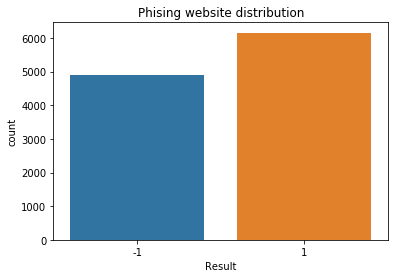

In [ ]:
sns.countplot(x='Result', data = df_phising);
plt.title('Phising website distribution')
plt.savefig('phishing_dataset.png') 
plt.show()

In [ ]:
def feature_engineering(file_name):
    if file_name == 'Wine':
        data1 = pd.read_csv('wineQualityWhites.csv')
        data2 = pd.read_csv('wineQualityReds.csv')
        data = data1.append(data2)
        print("Number of rows in wine quality dataset: ", data.shape[0])
        print("Number of attributes in wine quality dataset: ", data.shape[1])
        data.quality = data.quality.apply(lambda x: 1 if x > 5 else 0)
        data.describe(include='all')
    else:
        data = pd.read_csv('dataset.csv').astype('category')
        del data['index']
        print("Number of rows in pishing website dataset: ", data.shape[0])
        print("Number of attributes in pishing website dataset: ", data.shape[1])
        
        cols = ['URLURL_Length','having_Sub_Domain','SSLfinal_State','URL_of_Anchor','Links_in_tags','SFH','web_traffic','Links_pointing_to_page']
        data_1hot = data[cols]
        data_1hot = pd.get_dummies(data_1hot)
        df_others = data.drop(cols,axis=1)
        data = pd.concat([data_1hot,df_others],axis=1)
        data = data.replace(-1,0).astype('category')
        column_order = list(data)
        column_order.insert(0, column_order.pop(column_order.index('Result')))
        data = data.loc[:, column_order]
        data.describe(include='all')
    x_data = data.iloc[:,1:-1]
    y_data = data.iloc[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, test_size=0.2, random_state=7, shuffle=True, stratify=y_data)
    scaler = StandardScaler()
    x_train = scaler.fit(x_train).transform(x_train)
    x_test = scaler.fit(x_test).transform(x_test)
    return x_train, x_test, y_train, y_test

In [ ]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py
def plot_validation_curve(estimator, title, X, y, param_range,param_name,ylim=None, cv=None,n_jobs=None):
    plt.figure()
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    train_scores, test_scores = validation_curve(estimator, X, y, param_name,param_range,cv=cv, n_jobs=-1,scoring ='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    lw = 2
    plt.grid()
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.ylim(0,1.01)
    plt.legend(loc="best")
    return plt


In [ ]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(estimator, X, y,cv=cv, n_jobs=n_jobs,train_sizes=train_sizes, return_times=True, scoring ='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.ylim(0.5,1.01)
    plt.legend(loc="best")
    return plt

In [ ]:
def plot_performance(estimator, title,title1, X, y,ylim=None,cv=None,n_jobs=None,train_sizes=np.linspace(.1, 1.0, 5)):
    _, axes = plt.subplots(1, 2, figsize=(20, 5))
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(estimator, X, y,cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True, scoring ='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)
    
    # Plot n_samples vs fit_times
    axes[0].grid()
    axes[0].fill_between(train_sizes, fit_times_mean - fit_times_std,fit_times_mean + fit_times_std, alpha=0.1)
    axes[0].plot(train_sizes, fit_times_mean, 'o-')
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("fit_times")
    axes[0].set_title(title)
    
    # Plot n_samples  vs score_times
    axes[1].grid()
    axes[1].fill_between(train_sizes, score_times_mean - score_times_std,score_times_mean + score_times_std, alpha=0.1)
    axes[1].plot(train_sizes, score_times_mean, 'o-')
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("score_times")
    axes[1].set_title(title1)  
    return plt

In [ ]:
def classifier(learner,learner_name,param_name,param_label,param_range,x_train, x_test, y_train, y_test,dataset_name):
    cv = StratifiedKFold(10, shuffle=True, random_state=7)
    start_time = time.time()
    learner.fit(x_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    start_time = time.time()
    y_pred = cross_val_predict(learner, x_train, y_train, cv=cv, n_jobs=-1)
    end_time = time.time()
    test_time = end_time - start_time
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred,average='binary')
    print('Accuracy without hyperparameter tuning is %.2f%%' % (accuracy * 100))
    print('F1-Score without hyperparameter tuning is %.2f%%' % (f1 * 100))
    plot_learning_curve(learner,"Learning Curve of "+learner_name, x_train, y_train,cv=cv, n_jobs=-1)
    plt.savefig(dataset_name+'_'+learner_name+'learning_curve.png')
    tuned_learner = RandomizedSearchCV(learner,param_name,cv = cv, scoring = 'f1', random_state= 7, n_jobs=-1,refit = 'True')
    start_time = time.time()
    tuned_learner.fit(x_train, y_train)
    end_time = time.time()
    tuned_train_time = end_time - start_time
    start_time = time.time()
    y_pred = tuned_learner.predict(x_train)
    end_time = time.time()
    tuned_test_time = end_time - start_time
    accuracy_tuned = tuned_learner.best_score_
    acc_tuned = accuracy_score(y_train, y_pred)
    f1_tuned = f1_score(y_train, y_pred,average='binary')
    print('Accuracy  with hyperparameter tuning is %.2f%%' % (acc_tuned * 100))
    print('F1-Score with hyperparameter tuning is %.2f%%' % (f1_tuned * 100))
    print('Best Parameters are:'+ str(tuned_learner.best_params_))
    print('Best Estimator is:'+ str(tuned_learner.best_estimator_))
    final_learner = tuned_learner.best_estimator_
    final_learner.fit(x_test, y_test)
    y_pred = final_learner.predict(x_test)
    acc_final = accuracy_score(y_test, y_pred)
    f1_final = f1_score(y_test, y_pred,average='binary') 
    print('Accuracy  of final learner is %.2f%%' % (acc_final * 100))
    print('F1-Score of final learner is %.2f%%' % (f1_final * 100))
    plot_learning_curve(final_learner , "Learning Curve of Tuned "+learner_name, x_train, y_train,cv=cv, n_jobs=-1)
    plt.savefig(dataset_name+'_'+learner_name+'learning_curve_tuned.png')
    plot_validation_curve(final_learner, "Validation Curve of Tuned "+learner_name, x_train, y_train, param_range, param_label,cv=cv,n_jobs=-1)
    plt.savefig(dataset_name+'_'+learner_name+'validation_curve.png')
    plot_performance(final_learner,"Scalability of the model for "+learner_name,"Performance of the model for "+learner_name, x_train, y_train,cv=cv,n_jobs=-1)
    plt.savefig(dataset_name+'_'+learner_name+'model_performance.png')
    return learner,tuned_learner,f1,tuned_train_time,f1_final,tuned_test_time,accuracy,acc_final


In [ ]:
def plot_alg_comparison(dataset,accuracy,accuracy_tund,f1,f1_tund,train_time_tund,test_time_tund):
    plt.figure()
    _, axes = plt.subplots(1, 2, figsize=(20, 5))
    x = np.arange(5) 
    plt.sca(axes[0])
    plt.xticks(x, ('Decision tree', 'AdaBoost', 'kNN', 'SVM', 'Neural network'))
    best_accuracy = [ round((elem*100), 2) for elem in accuracy ]
    axes[0].bar(x,best_accuracy) 
    for i, j in zip(x,best_accuracy):
        axes[0].text(i, j, str(j), clip_on=True, ha='left',va='bottom', fontsize=12)
    axes[0].set_title('Learners before hyperparameter tuning for '+dataset)
    axes[0].set_ylabel('Accuracy')
    axes[0].set_ylim(60,105)

    plt.sca(axes[1])
    plt.xticks(x, ('Decision tree', 'AdaBoost', 'kNN', 'SVM', 'Neural network'))
    best_accuracy_tuned = [ round((elem*100), 2) for elem in accuracy_tund ]
    axes[1].bar(x,best_accuracy_tuned)
    for i, j in zip(x,best_accuracy_tuned):
        axes[1].text(i, j, str(j), clip_on=True, ha='left',va='bottom', fontsize=12)
    axes[1].set_title('Learners after hyperparameter tuning for '+dataset)
    axes[1].set_ylabel('Accuracy')
    axes[1].set_ylim(60,105)
    plt.savefig(dataset+'Accuracy_Comparison.png')
    plt.show()
    
    plt.figure()
    _, axes = plt.subplots(1, 2, figsize=(20, 5))
    x = np.arange(5) 
    plt.sca(axes[0])
    plt.xticks(x, ('Decision tree', 'AdaBoost', 'kNN', 'SVM', 'Neural network'))
    f1 = [ round((elem*100), 2) for elem in f1 ]
    axes[0].bar(x,f1) 
    for i, j in zip(x,f1):
        axes[0].text(i, j, str(j), clip_on=True, ha='left',va='bottom', fontsize=12)
    axes[0].set_title('Learners before hyperparameter tuning for '+dataset)
    axes[0].set_ylim(60,105)
    axes[0].set_ylabel('F1-Score')

    plt.sca(axes[1])
    plt.xticks(x, ('Decision tree', 'AdaBoost', 'kNN', 'SVM', 'Neural network'))
    f1_tund = [ round((elem*100), 2) for elem in f1_tund ]
    axes[1].bar(x,f1_tund)
    for i, j in zip(x,f1_tund):
        axes[1].text(i, j, str(j), clip_on=True, ha='left',va='bottom', fontsize=12)
    axes[1].set_title('Learners after hyperparameter tuning for '+dataset)
    axes[1].set_ylabel('F1-Score')
    axes[1].set_ylim(60,105)
    plt.savefig(dataset+'F1_Comparison.png')
    plt.show()
    
    plt.figure()
    _, axes = plt.subplots(1, 2, figsize=(20, 5))
    x = np.arange(5) 
    plt.sca(axes[0])
    plt.xticks(x, ('Decision tree', 'AdaBoost', 'kNN', 'SVM', 'Neural network'))
    train_time_tund = [ round(elem, 4) for elem in train_time_tund ]
    axes[0].bar(x,train_time_tund) 
    for i, j in zip(x,train_time_tund):
        axes[0].text(i, j, str(j), clip_on=True, ha='left',va='bottom', fontsize=12)
    axes[0].set_title('Learners after hyperparameter tuning for '+dataset)
    axes[0].set_ylabel('Training time (seconds)')

    plt.sca(axes[1])
    plt.xticks(x, ('Decision tree', 'AdaBoost', 'kNN', 'SVM', 'Neural network'))
    test_time_tuned = [ round(elem, 4) for elem in test_time_tund ]
    axes[1].bar(x,test_time_tuned)
    for i, j in zip(x,test_time_tuned):
        axes[1].text(i, j, str(j), clip_on=True, ha='left',va='bottom', fontsize=12)
    axes[1].set_title('Learners after hyperparameter tuning for '+dataset)
    axes[1].set_ylabel('Inference time (seconds)')
    plt.savefig(dataset+'Time_Comparison.png')
    plt.show()

In [ ]:
def learner_execution(file):
    x_train, x_test, y_train, y_test = feature_engineering(file_name=file)
    
    learner = DecisionTreeClassifier(random_state=7)
    param_range = list(range(5, 50, 5))
    param_name = {'max_depth' : param_range,'min_samples_leaf' : param_range,'min_samples_split' : param_range,'criterion' : ['gini','entropy'] }    
    DT_clf1,DT_clf2,DT_f1,DT_train_time2,DT_f1_tuned,DT_test_time2,DT_accuracy1,DT_accuracy2 = classifier(learner,'Decision_tree',param_name,'max_depth',param_range,x_train, x_test, y_train, y_test,file)

    learner = AdaBoostClassifier(random_state=7)
    param_range = list(range(5, 50, 5))
    param_name = {'n_estimators': param_range,'learning_rate': [0.1,0.2,0.5],'base_estimator': [DecisionTreeClassifier(random_state=7,max_depth=1),DecisionTreeClassifier(random_state=7,max_depth=2),DecisionTreeClassifier(random_state=7,max_depth=3),DecisionTreeClassifier(random_state=7,max_depth=4)],}
    Boost_clf1,Boost_clf2,Boost_f1,Boost_train_time2,Boost_f1_tuned,Boost_test_time2,Boost_accuracy1,Boost_accuracy2 = classifier(learner,'AdaBoost',param_name,'n_estimators',param_range,x_train, x_test, y_train, y_test,file)

    learner = KNeighborsClassifier()
    param_range = list(range(5, 75, 5))
    param_name = {'n_neighbors': param_range,'metric': ['euclidean', 'manhattan', 'chebyshev', 'mahalanobis'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':np.arange(1,50,5)}
    knn_clf1,knn_clf2,knn_f1,knn_train_time2,knn_f1_tuned,knn_test_time2,knn_accuracy1,knn_accuracy2 = classifier(learner,'kNN',param_name,'n_neighbors',param_range,x_train, x_test, y_train, y_test,file)

    learner = SVC(random_state=7)
    param_range = [1, 5, 10]
    param_name = {'kernel': ['sigmoid','linear', 'rbf'],'gamma': [0.1, 0.5, 1, 'auto'],'C': param_range}
    svm_clf1,svm_clf2,svm_f1,svm_train_time2,svm_f1_tuned,svm_test_time2,svm_accuracy1,svm_accuracy2 = classifier(learner,'SVM',param_name,'C',param_range,x_train, x_test, y_train, y_test,file)

    learner = MLPClassifier(random_state=7,early_stopping = True)
    param_range = [0.01, 0.1, 1]
    param_name = {'hidden_layer_sizes': [(100,),(100, 100)],'alpha':param_range,'max_iter':[500,1000],'learning_rate': ['constant','invscaling','adaptive'], 'activation':['identity','logistic','relu','tanh'],'solver':['sgd', 'adam','lbfgs'] }
    nn_clf1,nn_clf2,nn_f1,nn_train_time2,nn_f1_tuned,nn_test_time2,nn_accuracy1,nn_accuracy2 = classifier(learner,'Neural_network',param_name,'alpha',param_range,x_train, x_test, y_train, y_test,file)

    best_accuracy1 = [DT_accuracy1,Boost_accuracy1,knn_accuracy1,svm_accuracy1,nn_accuracy1]
    best_accuracy2 = [DT_accuracy2,Boost_accuracy2,knn_accuracy2,svm_accuracy2,nn_accuracy2]
    
    f1 = [DT_f1,Boost_f1,knn_f1,svm_f1,nn_f1]
    f1_tuned = [DT_f1_tuned,Boost_f1_tuned,knn_f1_tuned,svm_f1_tuned,nn_f1_tuned]
    
    train_time2 = [DT_train_time2,Boost_train_time2,knn_train_time2,svm_train_time2,nn_train_time2]
    test_time2 = [DT_test_time2,Boost_test_time2,knn_test_time2,svm_test_time2,nn_test_time2]
    
    return best_accuracy1,best_accuracy2,f1,f1_tuned,train_time2,test_time2


Number of rows in wine quality dataset:  6497
Number of attributes in wine quality dataset:  13
Accuracy without hyperparameter tuning is 75.83%
F1-Score without hyperparameter tuning is 80.94%
Accuracy  with hyperparameter tuning is 79.33%
F1-Score with hyperparameter tuning is 84.23%
Best Parameters are:{'min_samples_split': 5, 'min_samples_leaf': 30, 'max_depth': 45, 'criterion': 'entropy'}
Best Estimator is:DecisionTreeClassifier(criterion='entropy', max_depth=45, min_samples_leaf=30,
                       min_samples_split=5, random_state=7)
Accuracy  of final learner is 77.46%
F1-Score of final learner is 82.06%
Accuracy without hyperparameter tuning is 74.56%
F1-Score without hyperparameter tuning is 80.46%
Accuracy  with hyperparameter tuning is 80.47%
F1-Score with hyperparameter tuning is 84.93%
Best Parameters are:{'n_estimators': 20, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=7)}
Best Estimator is:AdaBoostClassifier(base_estima

/Users/sachin_divz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy  with hyperparameter tuning is 81.97%
F1-Score with hyperparameter tuning is 86.04%
Best Parameters are:{'solver': 'lbfgs', 'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'alpha': 1, 'activation': 'logistic'}
Best Estimator is:MLPClassifier(activation='logistic', alpha=1, early_stopping=True,
              hidden_layer_sizes=(100, 100), learning_rate='adaptive',
              max_iter=500, random_state=7, solver='lbfgs')


/Users/sachin_divz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy  of final learner is 82.00%
F1-Score of final learner is 85.99%


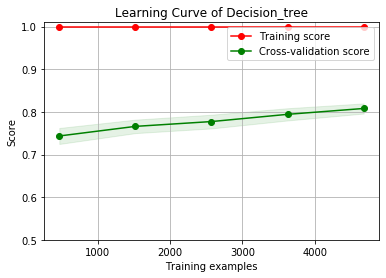

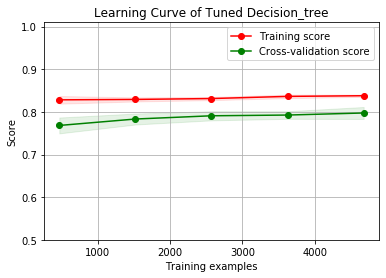

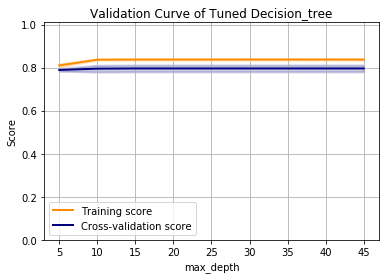

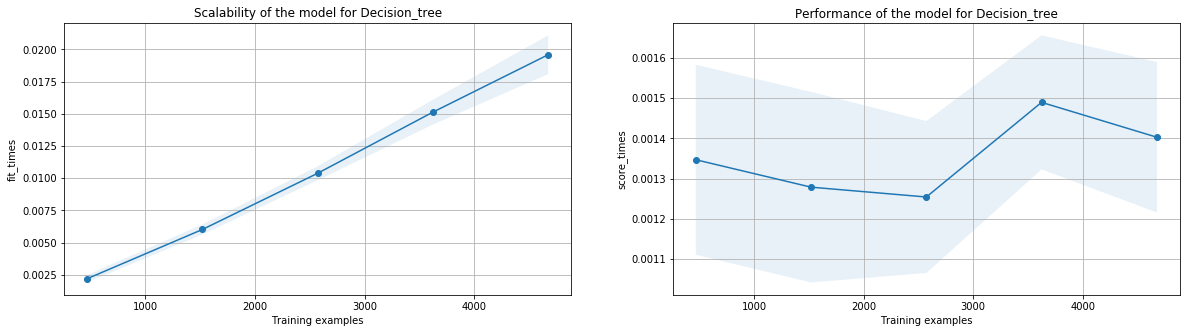

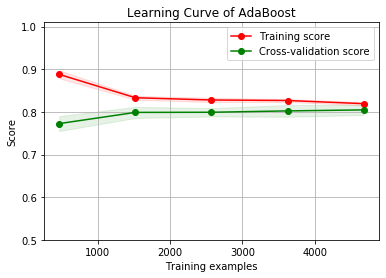

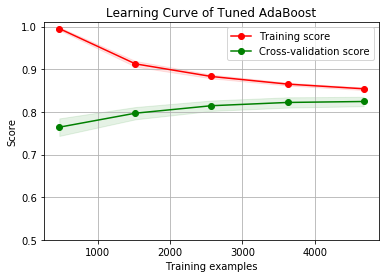

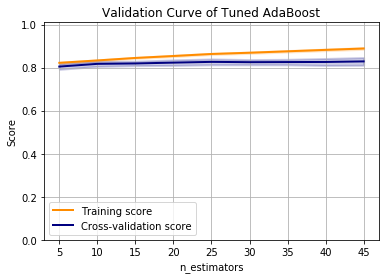

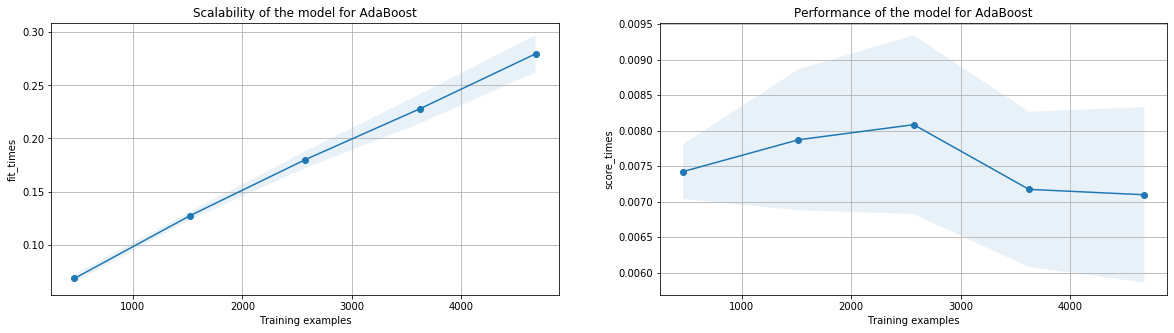

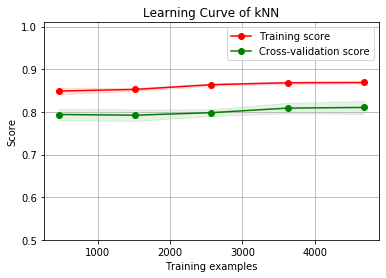

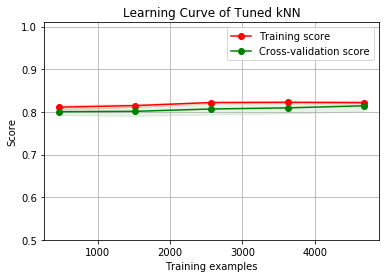

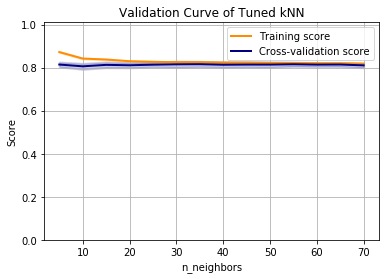

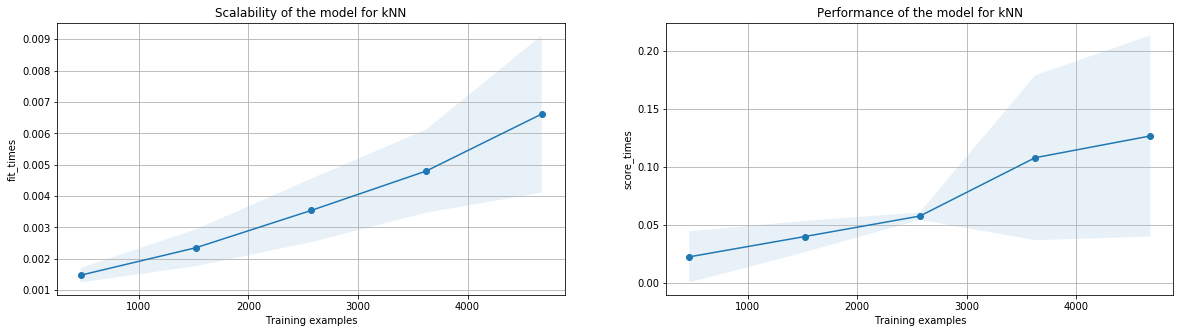

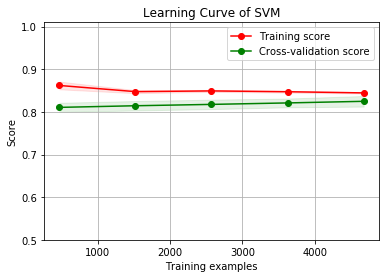

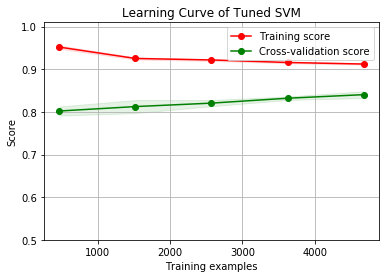

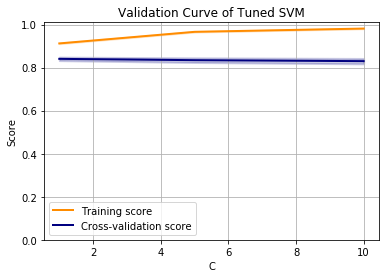

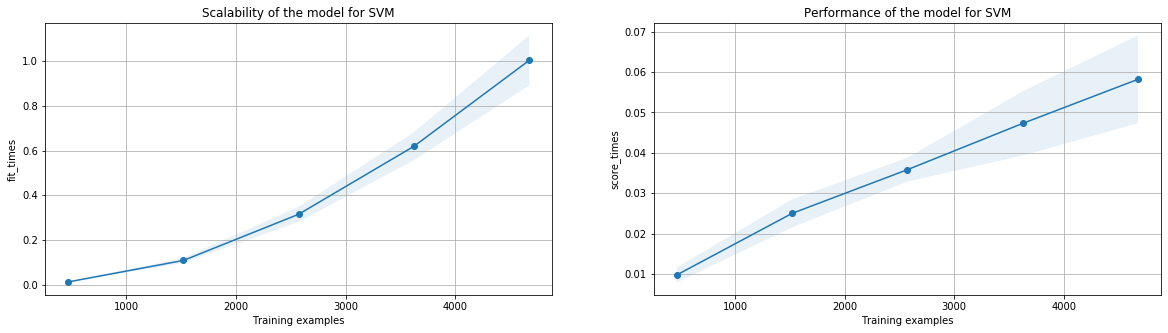

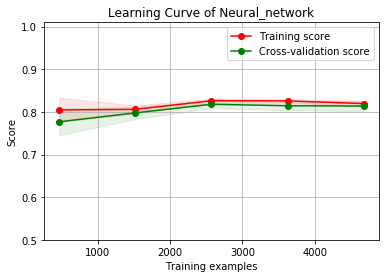

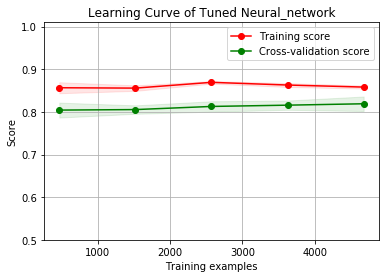

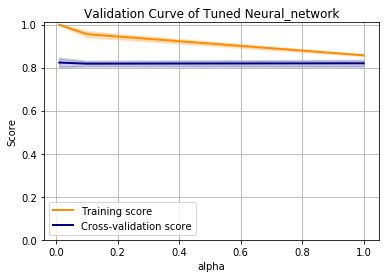

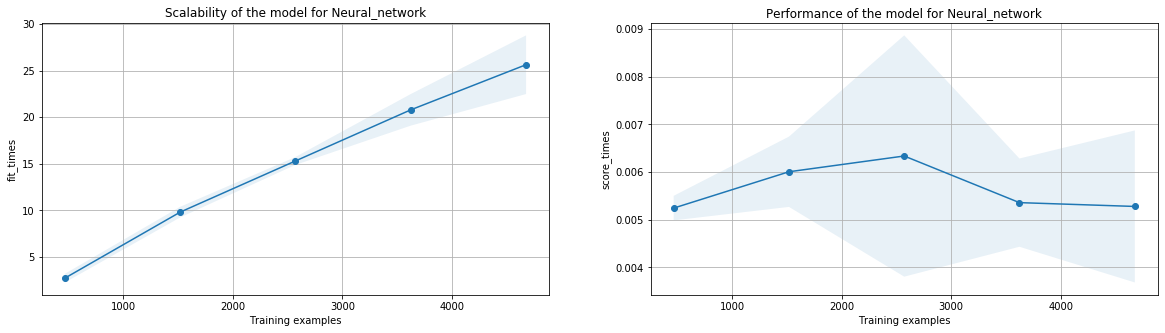

In [ ]:

wine_accuracy,wine_accuracy_tund,wine_f1,wine_f1_tund,wine_train_time,wine_test_time = learner_execution('Wine')


<Figure size 432x288 with 0 Axes>

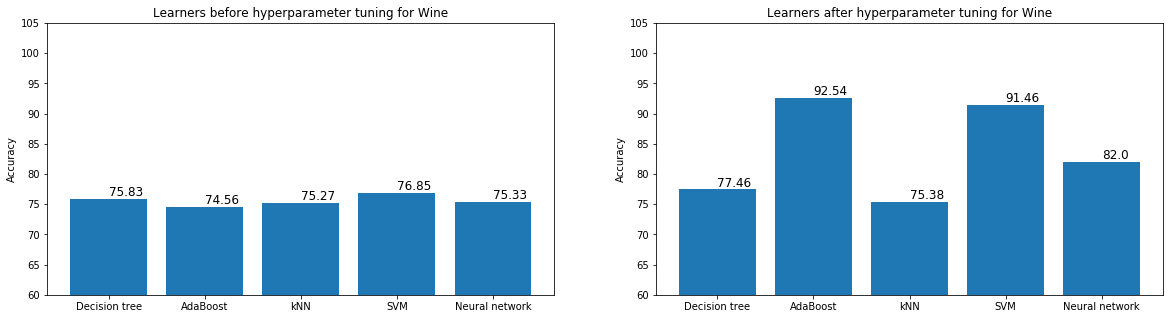

<Figure size 432x288 with 0 Axes>

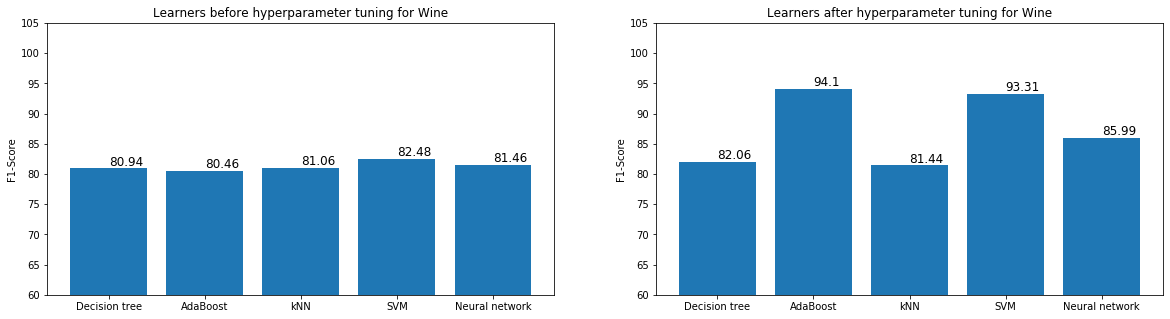

<Figure size 432x288 with 0 Axes>

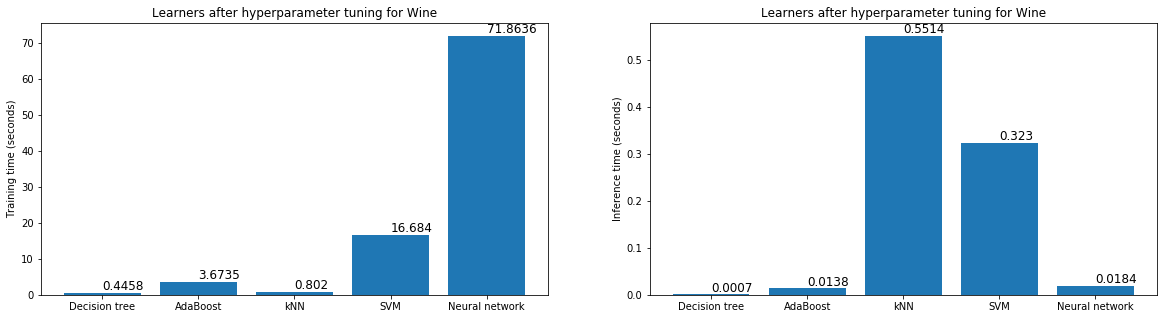

In [ ]:

plot_alg_comparison('Wine',wine_accuracy,wine_accuracy_tund,wine_f1,wine_f1_tund,wine_train_time,wine_test_time)


Number of rows in pishing website dataset:  11055
Number of attributes in pishing website dataset:  31
Accuracy without hyperparameter tuning is 92.01%
F1-Score without hyperparameter tuning is 95.34%
Accuracy  with hyperparameter tuning is 93.54%
F1-Score with hyperparameter tuning is 96.33%
Best Parameters are:{'min_samples_split': 25, 'min_samples_leaf': 10, 'max_depth': 15, 'criterion': 'gini'}
Best Estimator is:DecisionTreeClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=25,
                       random_state=7)
Accuracy  of final learner is 91.68%
F1-Score of final learner is 95.30%
Accuracy without hyperparameter tuning is 89.79%
F1-Score without hyperparameter tuning is 94.30%
Accuracy  with hyperparameter tuning is 93.39%
F1-Score with hyperparameter tuning is 96.28%
Best Parameters are:{'n_estimators': 20, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=7)}
Best Estimator is:AdaBoostClassifier(base_estimator=DecisionTre

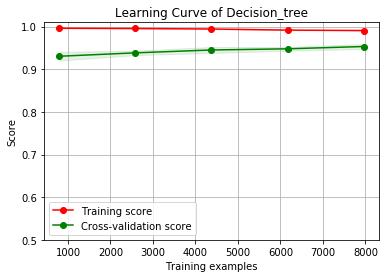

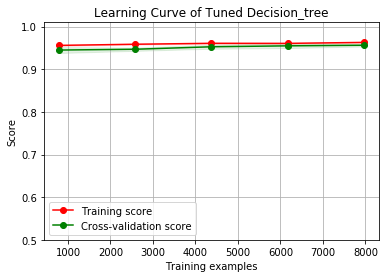

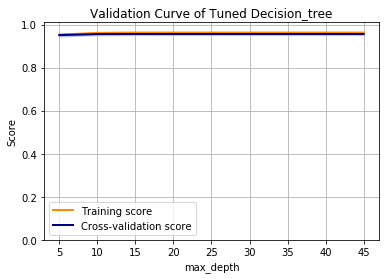

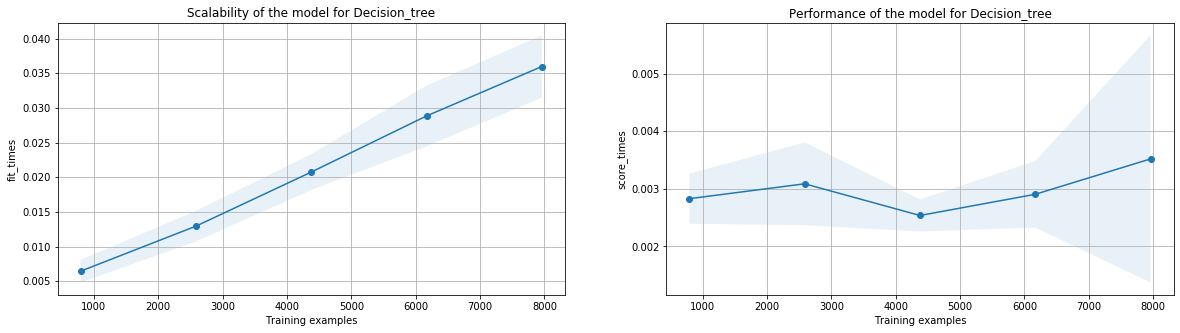

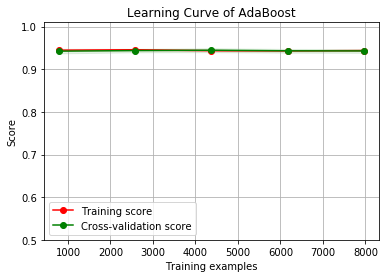

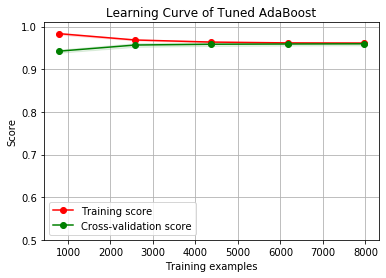

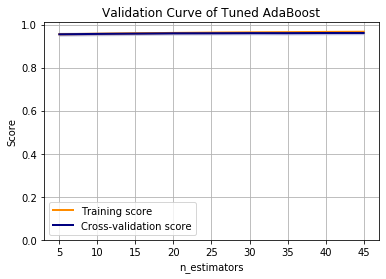

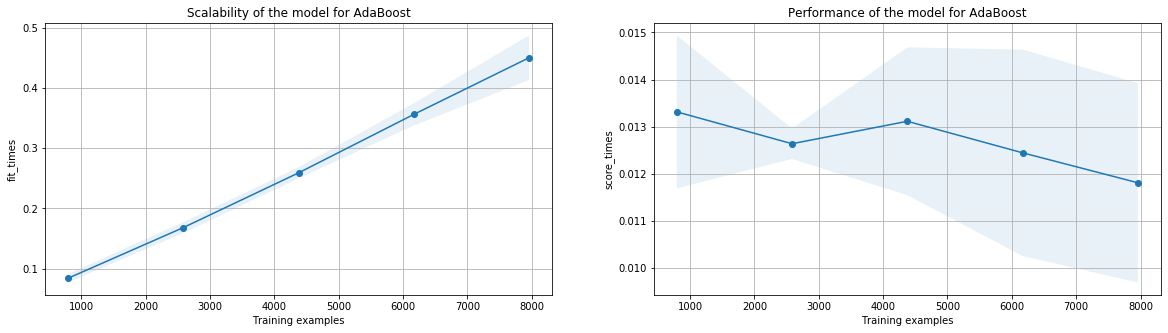

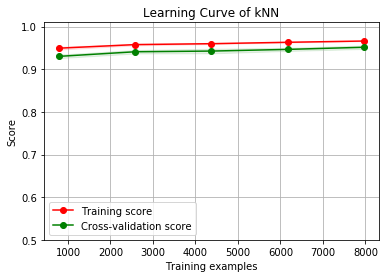

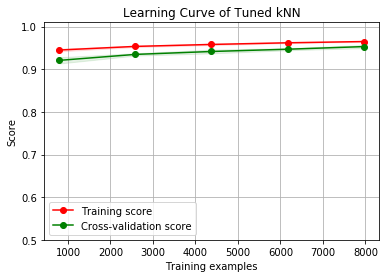

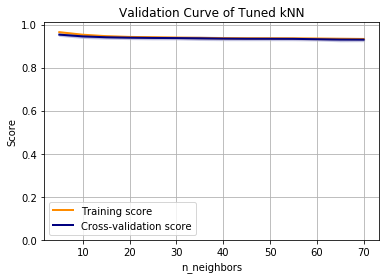

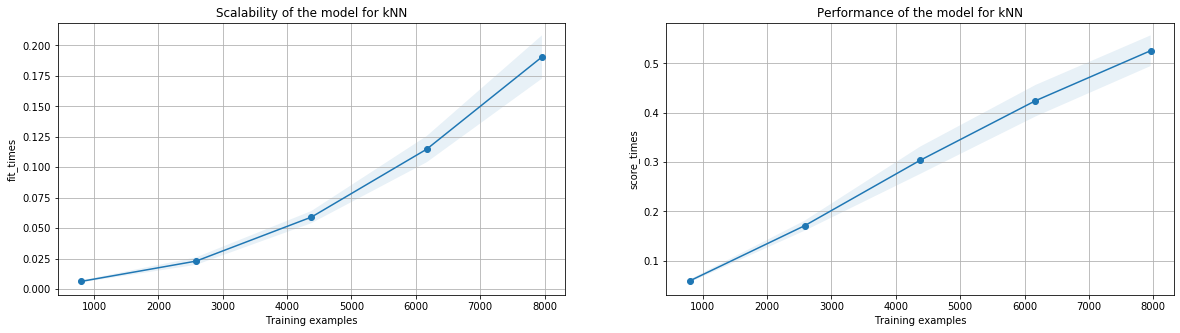

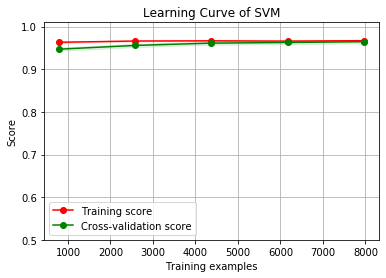

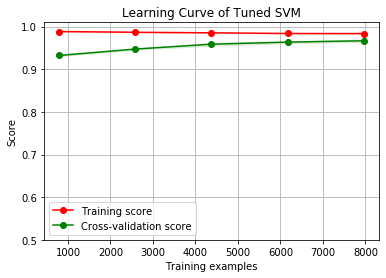

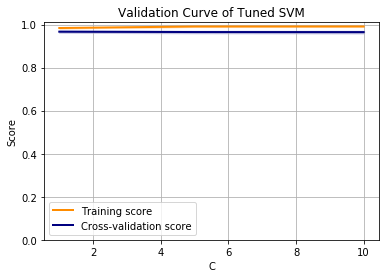

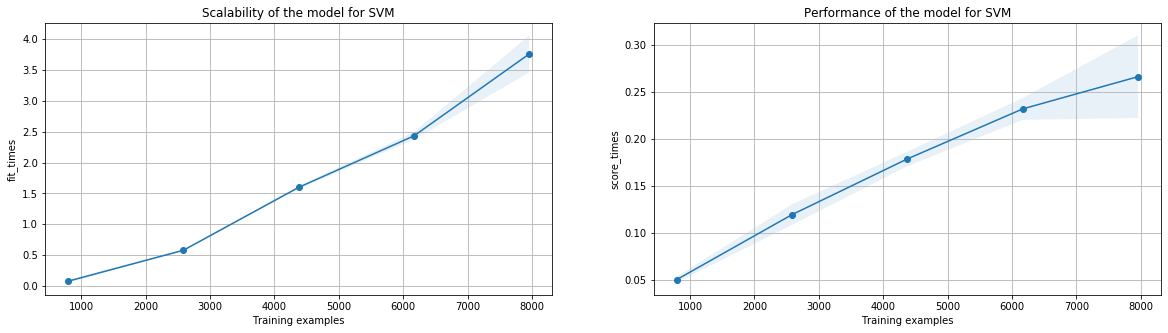

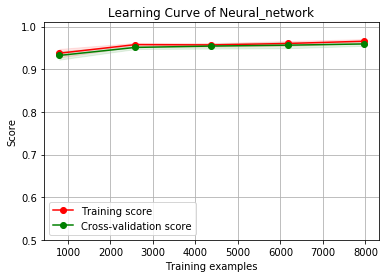

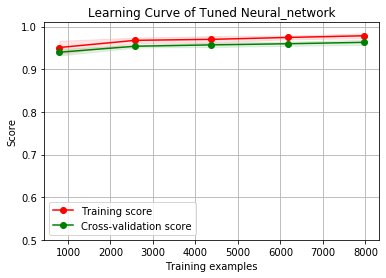

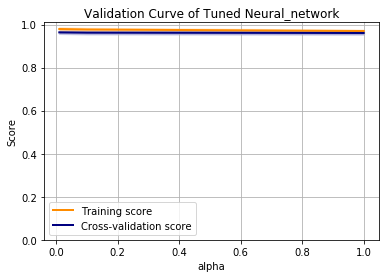

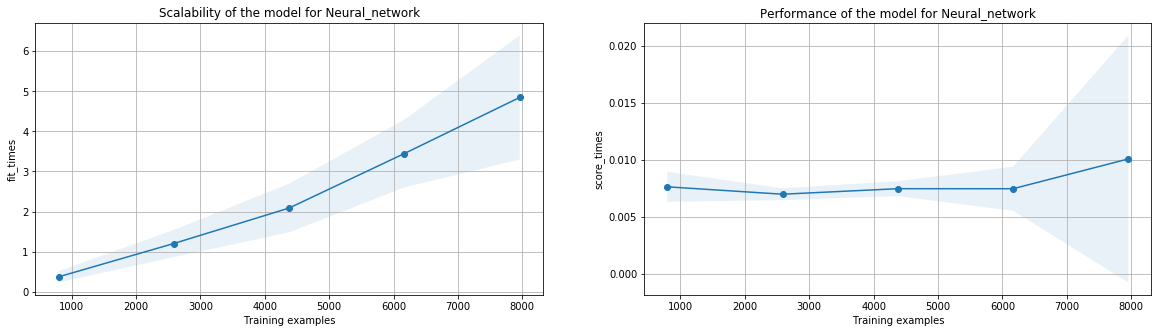

In [ ]:
phishing_accuracy,phishing_accuracy_tund,phishing_f1,phishing_f1_tund,phishing_train_time,phishing_test_time = learner_execution('Phishing')


<Figure size 432x288 with 0 Axes>

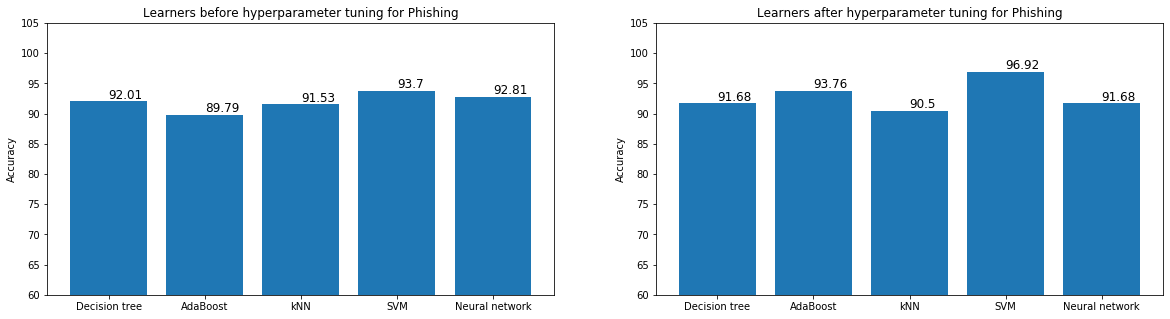

<Figure size 432x288 with 0 Axes>

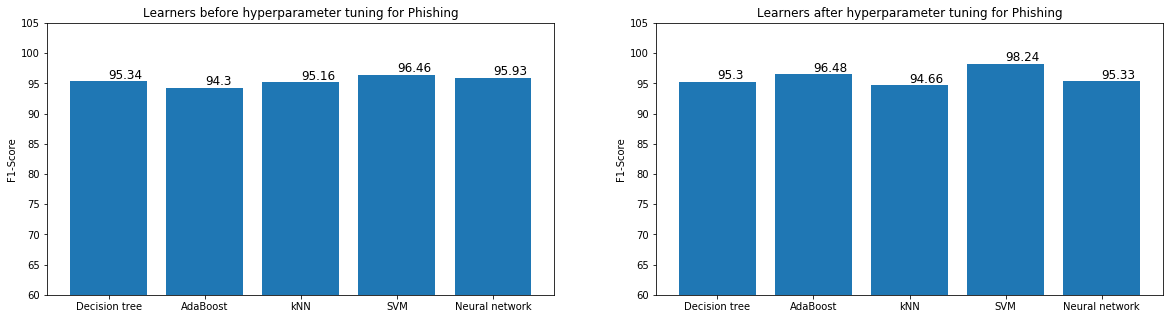

<Figure size 432x288 with 0 Axes>

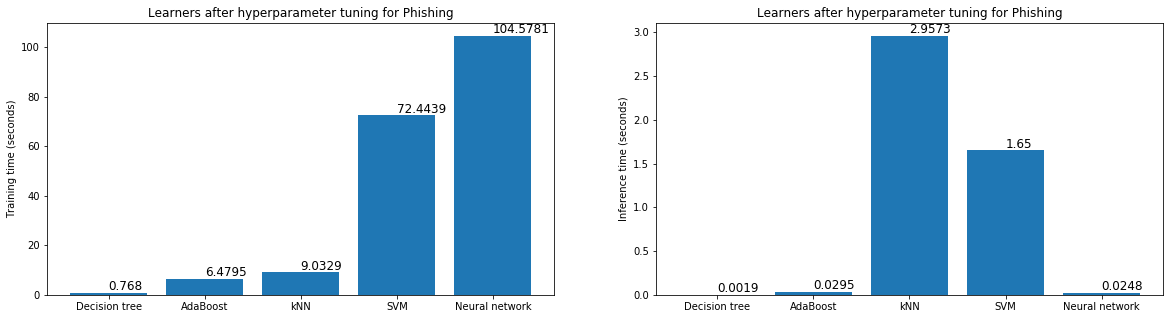

In [ ]:
plot_alg_comparison('Phishing',phishing_accuracy,phishing_accuracy_tund,phishing_f1,phishing_f1_tund,phishing_train_time,phishing_test_time)


In [ ]:
print("time taken",(time.time() - start)/60)

time taken 17.02050151824951


In [ ]:
#Reference
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
#https://www.ritchieng.com/machinelearning-learning-curve/
#https://www.geeksforgeeks.org/validation-curve/